In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
from pandas.core.groupby.generic import DataFrameGroupBy
dataset_url = '/content/drive/MyDrive/robica_project_1/dataset-socialMedia.xlsx'
df = pd.read_excel(dataset_url)

Wel will print first 5 rows to get a general idea about the dataset.

In [ ]:
df.head()

,روز,کاربر فعال روزانه,سرانه ترافیک مصرفی کاربران,کاربر جدید,تعداد پیام‌های ارسالی(متنی، صوتی و تصویری),تعداد لایوها,تعداد تماس صوتی و تصویری,تعداد فوروارد پیام,تعداد پیام کانال,تعداد بازدید پیام‌های کانال,کاربر موثر کانال,کانال جدید ایجاد شده,ملحق شدن به کانال‌ها
0,1,35072000.0,237.920,195648.0,2208758400,373088,14495296,50504320,11465024,13024512000,31874742.4,53968,17173888
1,2,34656000.0,237.600,195193.6,2232246400,359136,14689856,66035840,14879584,10912576000,32196083.2,66112,21804512
2,3,34656000.0,241.984,190816.0,2195232000,386272,14534720,64631040,14693280,15330752000,32508924.8,66480,23730528
3,4,34144000.0,240.896,189081.6,2111395200,413888,14008320,62546560,14537344,17961344000,32078841.6,67664,23700960
4,5,33184000.0,250.656,185542.4,2211222400,439552,13206176,62179840,14375008,21135840000,31338800.0,68512,22110848


Then we will use `info` method to get some information about the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   روز                                         92 non-null     int64  
 1   کاربر فعال روزانه                           92 non-null     float64
 2   سرانه ترافیک مصرفی کاربران                  92 non-null     float64
 3   کاربر جدید                                  92 non-null     float64
 4   تعداد پیام‌های ارسالی(متنی، صوتی و تصویری)  92 non-null     int64  
 5   تعداد لایوها                                92 non-null     int64  
 6   تعداد تماس صوتی و تصویری                    92 non-null     int64  
 7   تعداد فوروارد پیام                          92 non-null     int64  
 8   تعداد پیام کانال                            92 non-null     int64  
 9   تعداد بازدید پیام‌های کانال                 92 non-null     int64  
 10  کاربر موثر کانال

We will change column names into English names:

In [ ]:
df.columns

Index(['روز', 'کاربر فعال روزانه', 'سرانه ترافیک مصرفی کاربران ', 'کاربر جدید',
       'تعداد پیام‌های ارسالی(متنی، صوتی و تصویری)', 'تعداد لایوها',
       'تعداد تماس صوتی و تصویری', 'تعداد فوروارد پیام', 'تعداد پیام کانال',
       'تعداد بازدید پیام‌های کانال', 'کاربر موثر کانال',
       'کانال جدید ایجاد شده', 'ملحق شدن به کانال‌ها'],
      dtype='object')

In [ ]:
df.rename(columns={
        'روز': 'day',
        'کاربر فعال روزانه': 'active_users',
        'سرانه ترافیک مصرفی کاربران ':'TCC',
        'کاربر جدید':'new_users',
        'تعداد پیام‌های ارسالی(متنی، صوتی و تصویری)':'message_count',
        'تعداد لایوها':'live_count',
        'تعداد تماس صوتی و تصویری':'call_count',
        'تعداد فوروارد پیام':'forward_count',
        'تعداد پیام کانال':'channel_message_count',
        'تعداد بازدید پیام‌های کانال':'channel_views',
        'کاربر موثر کانال':'channel_effective_user',
        'کانال جدید ایجاد شده':'new_channels',
        'ملحق شدن به کانال‌ها':'join_channels',
    }, inplace=True)
df.columns

Index(['day', 'active_users', 'TCC', 'new_users', 'message_count',
       'live_count', 'call_count', 'forward_count', 'channel_message_count',
       'channel_views', 'channel_effective_user', 'new_channels',
       'join_channels'],
      dtype='object')

In [ ]:
dataset = df.copy()

### Plot related to the number of active users in these 92 days:

In [ ]:
import plotly.graph_objects as go

# Create a Plotly scatter plot with hover data
fig = go.Figure(data=go.Scatter(x=dataset['day'], y=dataset['active_users'], mode='lines+markers', name='Active Users'))

# Customize the layout
fig.update_layout(
    title='Active Users Over Time',
    xaxis=dict(title='Day'),
    yaxis=dict(title='Active Users'),
    hovermode='x',  # Show hover data on the x-axis
    showlegend=True
)

# Set the plot's width (optional)
fig.update_layout(width=800)

# Show the interactive plot
fig.show()

### Plot related to the number of new users in these 92 days:

In [ ]:
# Create a Plotly scatter plot with hover data
fig = go.Figure(data=go.Scatter(x=dataset['day'], y=dataset['new_users'], mode='lines+markers', name='New Users'))

# Customize the layout
fig.update_layout(
    title='New Users Over Time',
    xaxis=dict(title='Day'),
    yaxis=dict(title='New Users'),
    hovermode='x',  # Show hover data on the x-axis
    showlegend=True
)

# Set the plot's width (optional)
fig.update_layout(width=800)

# Show the interactive plot
fig.show()

### The plot related to the number of messages sent in these 92 days:

In [ ]:
# Create a Plotly scatter plot with hover data
fig = go.Figure(data=go.Scatter(x=dataset['day'], y=dataset['message_count'], mode='lines+markers', name='Message Count'))

# Customize the layout
fig.update_layout(
    title='Message Count Over Time',
    xaxis=dict(title='Day'),
    yaxis=dict(title='Message Count'),
    hovermode='x',  # Show hover data on the x-axis
    showlegend=True
)

# Set the plot's width (optional)
fig.update_layout(width=800)

# Show the interactive plot
fig.show()

Next, we will study the number of messages sent and the number of daily active users in a single plot:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the dataset for normalization
normalized_dataset = dataset.copy()

# Normalize 'message_count' and 'active_users' columns
scaler = MinMaxScaler()
normalized_dataset[['message_count', 'active_users']] = scaler.fit_transform(dataset[['message_count', 'active_users']])

# Create a Plotly figure with two traces
fig = go.Figure()

# Add a trace for 'message_count'
fig.add_trace(go.Scatter(x=dataset['day'], y=normalized_dataset['message_count'], mode='lines+markers', name='Normalized Message Count'))

# Add a trace for 'active_users'
fig.add_trace(go.Scatter(x=dataset['day'], y=normalized_dataset['active_users'], mode='lines+markers', name='Normalized Active Users'))

# Customize the layout
fig.update_layout(
    title='Normalized Message Count and Active Users Over 92 Days',
    xaxis=dict(title='Day', showgrid=True),  # Show gridlines on the x-axis
    yaxis=dict(title='Normalized Value', showgrid=True),  # Show gridlines on the y-axis
    hovermode='x',  # Show hover data on the x-axis
)

# Set the plot's width (optional)
fig.update_layout(width=800)

# Show the interactive plot
fig.show()

According to the plot above, it seems that there is a direct relationship between the two components of the number of messages sent per day and the number of active users on that day.

In [ ]:
def largest_decrease(var,num):
  dataset['change'] = dataset[var].diff()

  # Find the days with the largest decreases in message_count
  num = int(num)
  days_with_largest_decreases = dataset.nsmallest(num,'change')['day']

  # Display the days with the largest decreases
  print(f"Days with the largest decreases in {var}:")
  print(days_with_largest_decreases)

In [ ]:
largest_decrease('message_count',3)

Days with the largest decreases in message_count:
9     10
24    25
65    66
Name: day, dtype: int64


On the 10th, 25th, and 66th days, the largest decrease in the number of messages sent compared to the previous day can be seen.

In [ ]:
largest_decrease('active_users',3)

Days with the largest decreases in active_users:
23    24
10    11
31    32
Name: day, dtype: int64


On the 10th, 25th, and 66th days, the largest decrease in the number of messages sent compared to the previous day can be seen.

In [ ]:
def largest_increase(var,num):
  dataset['change'] = dataset[var].diff()

  # Find the days with the largest decreases in message_count
  num = int(num)
  days_with_largest_decreases = dataset.nlargest(num,'change')['day']

  # Display the days with the largest decreases
  print(f"Days with the largest increase in {var}:")
  print(days_with_largest_decreases)

In [ ]:
largest_increase('active_users',3)

Days with the largest increase in active_users:
30    31
89    90
15    16
Name: day, dtype: int64


On the 31st, 90th and 16th, we observe the largest increase in the number of active users compared to the previous day.

### Plot of `Call Count` over these 92 days

In [ ]:
# Create a Plotly scatter plot with hover data
fig = go.Figure(data=go.Scatter(x=dataset['day'], y=dataset['call_count'], mode='lines+markers', marker=dict(symbol='circle', size=8),
                                hovertext=['Date: {}, Call Count: {}'.format(day, call_count) for day, call_count in zip(dataset['day'], dataset['call_count'])]))

# Customize the layout
fig.update_layout(
    title='Call Count Over 92 Days',
    xaxis=dict(title='Day'),
    yaxis=dict(title='Call Count', showgrid=True),  # Show grid lines on the y-axis
    hovermode='closest'  # Show hover data for the closest point
)

# Set the plot's width
fig.update_layout(width=800)

# Show the interactive plot
fig.show()

In [ ]:
# Add a new column 'call_mess' which is the sum of 'message_count' and 'call_count'
dataset['call_mess'] = dataset['message_count'] + dataset['call_count']

The biggest decrease in the total number of messages and calls was from the 62nd day to the 68th day.

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# Normalize 'active_users' and 'call_mess' data
normalized_active_users = (dataset['active_users'] - dataset['active_users'].min()) / (dataset['active_users'].max() - dataset['active_users'].min())
normalized_call_mess = (dataset['call_mess'] - dataset['call_mess'].min()) / (dataset['call_mess'].max() - dataset['call_mess'].min())

# Create a Plotly figure
fig = go.Figure()

# Add traces for Normalized Active Users using Plotly Scatter
fig.add_trace(go.Scatter(x=dataset['day'], y=normalized_active_users, mode='lines', name='Normalized Active Users', line=dict(color='blue')))

# Create a secondary y-axis for Normalized Message Count
fig.update_layout(
    yaxis=dict(title='Normalized Active Users', titlefont=dict(color='blue')),
    yaxis2=dict(title='Normalized Message Count', titlefont=dict(color='red'), overlaying='y', side='right'),
    xaxis=dict(title='Day')
)

# Add traces for Normalized Message Count using Plotly Scatter
fig.add_trace(go.Scatter(x=dataset['day'], y=normalized_call_mess, mode='lines', name='Normalized Call and Message Count', line=dict(color='red')))

# Customize the layout
fig.update_layout(
    title='Comparison of Normalized Active Users and Normalized Call and Message Count',
    hovermode='x',  # Show hover data on the x-axis
    showlegend=True
)

# Show the interactive plot
fig.show()

In [ ]:
def period_with_max_definit_decrease(var):
  largest_decrease_period = []
  current_decrease_period = []

  max_decrease = 0  # Variable to track the maximum decrease
  max_decrease_period = []  # Period with the maximum decrease

  for index, row in dataset.iterrows():
      if not current_decrease_period:
          current_decrease_period.append(row)
      else:
          prev_row = current_decrease_period[-1]
          if row[var] <=  prev_row[var]:
              current_decrease_period.append(row)
          else:
              if len(current_decrease_period) > len(largest_decrease_period):
                  largest_decrease_period = current_decrease_period.copy()
                  max_decrease = largest_decrease_period[0][var] - largest_decrease_period[-1][var]
                  max_decrease_period = largest_decrease_period
              current_decrease_period = []

  # Extract the start and end dates of the period with the maximum decrease
  if len(max_decrease_period) > 0:
      start_date = max_decrease_period[0]['day']
      end_date = max_decrease_period[-1]['day']
      print(f"Period with Maximum Strict Decrease in {var}: From {int(start_date)} to {int(end_date)}")
  else:
      print("No strict decrease found.")

In [ ]:
period_with_max_definit_decrease('call_mess')

Period with Maximum Strict Decrease in call_mess: From 62 to 68


In [ ]:
period_with_max_definit_decrease('active_users')

Period with Maximum Strict Decrease in active_users: From 35 to 40


In [ ]:
period_with_max_definit_decrease('channel_effective_user')

Period with Maximum Strict Decrease in channel_effective_user: From 49 to 54


### Plot of `Channel effective users count` over these 92 days

In [ ]:
# Create a Plotly scatter plot with hover data
fig = go.Figure(data=go.Scatter(x=dataset['day'], y=dataset['channel_effective_user'], mode='lines+markers',
                                marker=dict(symbol='circle', size=8),
                                hovertext=['Date: {}, Channel Effective User Count: {}'.format(day, count) for day, count in zip(dataset['day'], dataset['channel_effective_user'])]))

# Customize the layout
fig.update_layout(
    title='Channel Effective User Count Over 92 Days',
    xaxis=dict(title='Day', showgrid=True),  # Show gridlines on the x-axis
    yaxis=dict(title='Channel Effective User Count', showgrid=True),  # Show gridlines on the y-axis
    hovermode='closest'  # Show hover data for the closest point
)

# Set the plot's width (optional)
fig.update_layout(width=800)

# Show the interactive plot
fig.show()

In [ ]:
int(dataset.loc[dataset['channel_effective_user'].idxmin()]['day'])

68

In [ ]:
int(dataset.loc[dataset['call_mess'].idxmin()]['day'])

68

In [ ]:
int(dataset.loc[dataset['active_users'].idxmin()]['day'])

68

In [ ]:
int(dataset.loc[dataset['join_channels'].idxmin()]['day'])

68

In [ ]:
int(dataset.loc[dataset['new_users'].idxmin()]['day'])

68

In [ ]:
int(dataset.loc[dataset['new_channels'].idxmin()]['day'])

68

On the 68th day, all the items of the number of effective users, the total number of calls and messages, active users, the number of joining channels, the number of new users and the number of new channels created have their lowest values ​​in this 92-day period, which is noteworthy.

In [ ]:
# Create a Plotly scatter plot with hover data
fig = go.Figure(data=go.Scatter(x=dataset['day'], y=dataset['live_count'], mode='lines+markers', name='Live Count'))

# Customize the layout
fig.update_layout(
    title='Live Count Over 92 Days',
    xaxis=dict(title='Day'),
    yaxis=dict(title='Live Count'),
    hovermode='x',  # Show hover data on the x-axis
    xaxis_showgrid=True,  # Show x-axis gridlines
    yaxis_showgrid=True  # Show y-axis gridlines
)

# Set the plot's width (optional)
fig.update_layout(width=800)

# Show the interactive plot
fig.show()

It seems that the number of live shows has decreased in this 92-day period.

In [ ]:
# Create a Plotly figure with two traces
fig = go.Figure()

# Add a trace for 'Channel Effective User'
fig.add_trace(go.Scatter(x=dataset['day'], y=dataset['channel_effective_user'], mode='lines+markers', name='Channel Effective User'))

# Add a trace for 'Join Channels'
fig.add_trace(go.Scatter(x=dataset['day'], y=dataset['join_channels'], mode='lines+markers', name='Join Channels', yaxis='y2'))

# Customize the layout
fig.update_layout(
    title='Number of Channel Effective Users and Joining Channels Over Time',
    xaxis=dict(title='Day'),
    yaxis=dict(title='Channel Effective Users', showgrid=True),
    yaxis2=dict(title='Joining Channels', overlaying='y', side='right', showgrid=True),
    hovermode='x',  # Show hover data on the x-axis
)

# Set the plot's width (optional)
fig.update_layout(width=800)

# Show the interactive plot
fig.show()

The number of effective users of the channel and the number of joining the channels have also decreased in this 92 day period.

### Correlation Matrix Heatmap

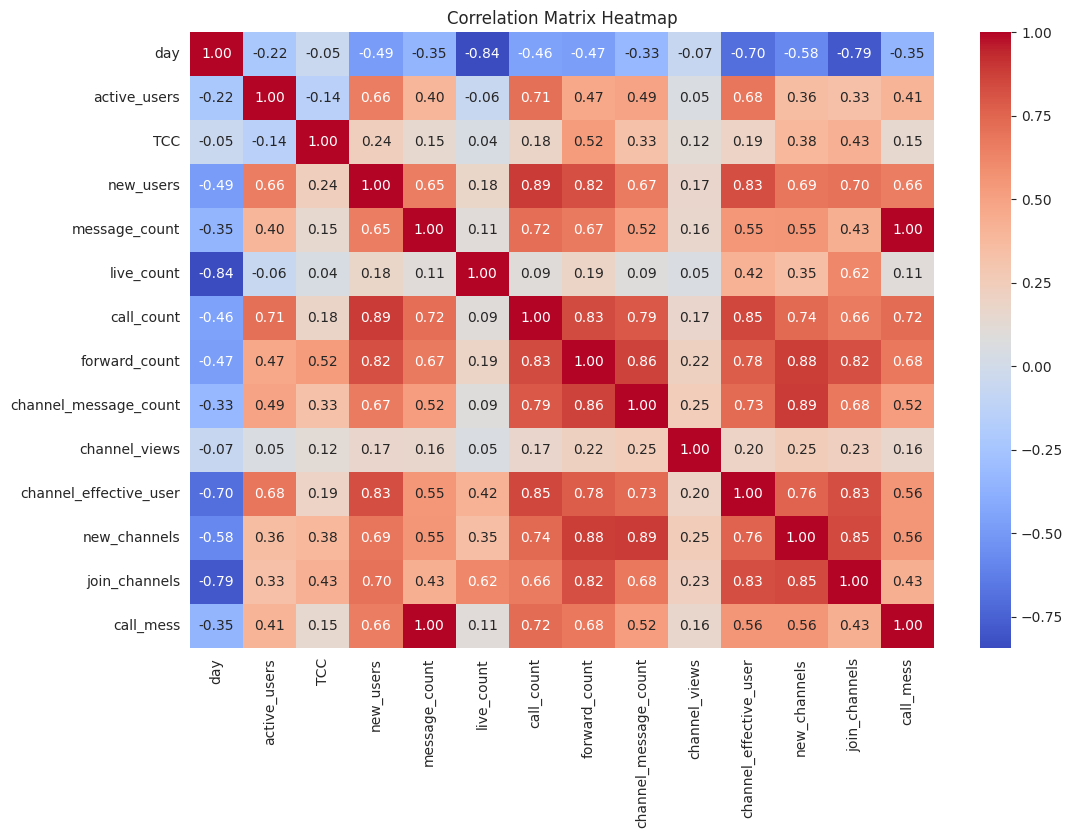

In [ ]:
# Compute the correlation matrix
dataset = dataset.drop('change',axis=1)
correlation_matrix = dataset.corr(numeric_only=True)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Plot of traffic consumption trend in the given time period



In [ ]:
# Create a Plotly scatter plot with hover data
fig = go.Figure(data=go.Scatter(x=dataset['day'], y=dataset['TCC'], mode='markers+lines', marker=dict(symbol='circle', size=8),
                                hovertext=['Day: {}, TCC: {}'.format(day, tcc) for day, tcc in zip(dataset['day'], dataset['TCC'])]))

# Customize the layout
fig.update_layout(
    title='TCC Over 92 Days',
    xaxis=dict(title='Day'),
    yaxis=dict(title='TCC', showgrid=True),  # Show grid lines on the y-axis
    hovermode='closest',  # Show hover data for the closest point
)

# Set the plot's width (optional)
fig.update_layout(width=800)

# Show the interactive plot
fig.show()

According to the plot above, from day 24 to day 46, TCC has seen the greatest decrease in this 92-day period.

### Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_regression

X = df.copy()
y = X.pop('TCC')

#print(X)
# Calculate MI scores for regression
mi_scores = mutual_info_regression(X, y)

# Create a pandas DataFrame to associate MI scores with feature names
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)

# Sort the features by MI score in descending order
mi_scores = mi_scores.sort_values(ascending=False)

# Display the MI scores for the features
print(mi_scores)

day                       0.901415
live_count                0.346048
join_channels             0.315027
new_channels              0.265284
channel_message_count     0.164322
forward_count             0.158830
call_count                0.156977
channel_views             0.150347
message_count             0.105507
new_users                 0.077682
active_users              0.037303
channel_effective_user    0.000000
Name: MI Scores, dtype: float64


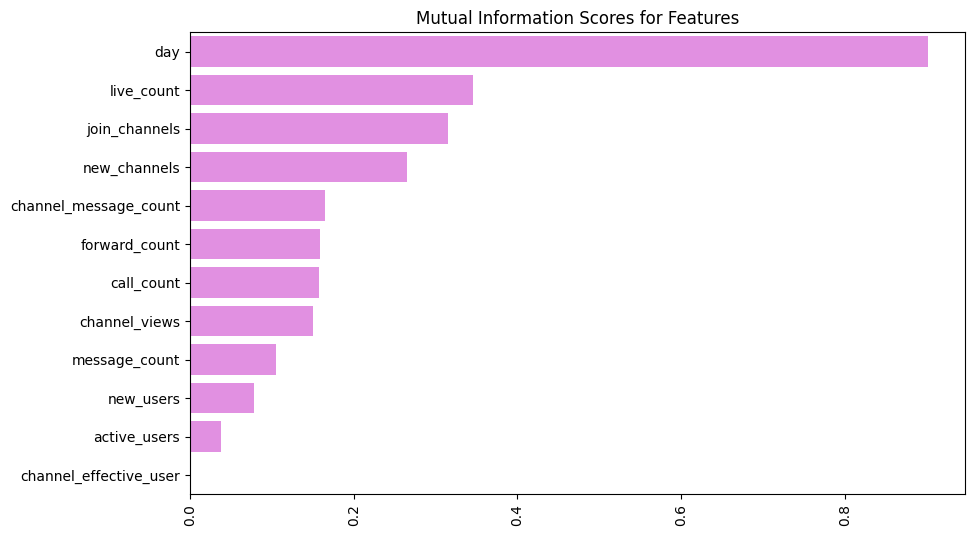

In [ ]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mi_scores.values, y=mi_scores.index,color='violet')

# Customize the x and y-axis labels
#ax.set(xlabel="Custom X-axis Label", ylabel="Custom Y-axis Label")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title
plt.title("Mutual Information Scores for Features")

# Show the plot
plt.show()

We use the correlation criterion to check the effectiveness of TCC on each of the indicators. And we also draw the corresponding plot.

Correlations with TCC:
TCC                       1.000000
forward_count             0.524649
join_channels             0.430622
new_channels              0.381928
channel_message_count     0.328253
new_users                 0.236070
channel_effective_user    0.194889
call_count                0.183358
call_mess                 0.147028
message_count             0.146418
channel_views             0.116057
live_count                0.036564
day                      -0.050082
active_users             -0.139251
Name: TCC, dtype: float64


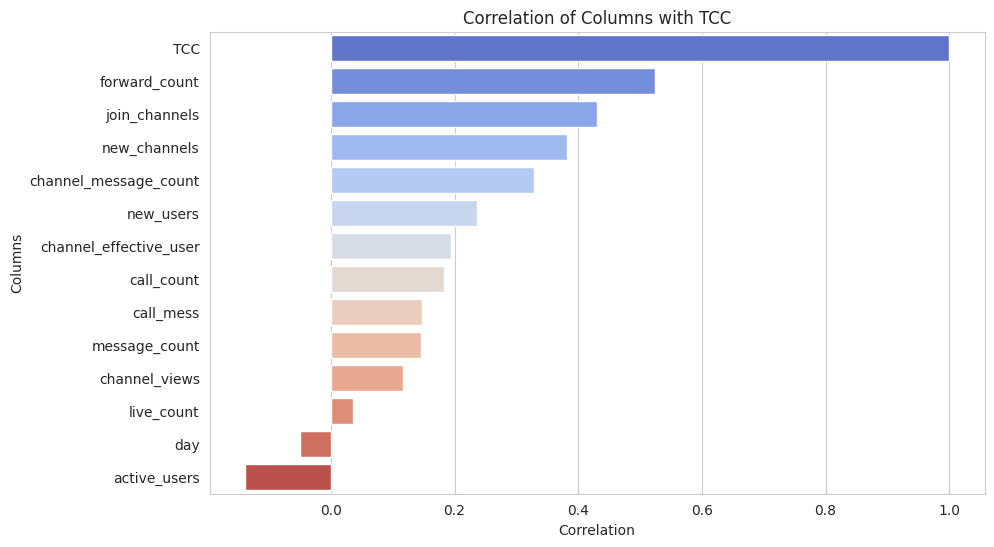

In [ ]:
# Calculate the correlation between TCC and other columns
correlations = dataset.corr()['TCC'].sort_values(ascending=False)

# Print the correlations
print("Correlations with TCC:")
print(correlations)

# Visualize the correlations (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.xlabel("Correlation")
plt.ylabel("Columns")
plt.title("Correlation of Columns with TCC")
plt.show()